In [13]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.decomposition import PCA
from sklearn import manifold

%matplotlib inline
matplotlib.style.use('ggplot')

In [36]:
df = pd.read_csv('train.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [37]:
df['season'] = df['season'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weather'] = df['weather'].astype('category')
df['datetime'] = df['datetime'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
df.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [38]:
df.corr()

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


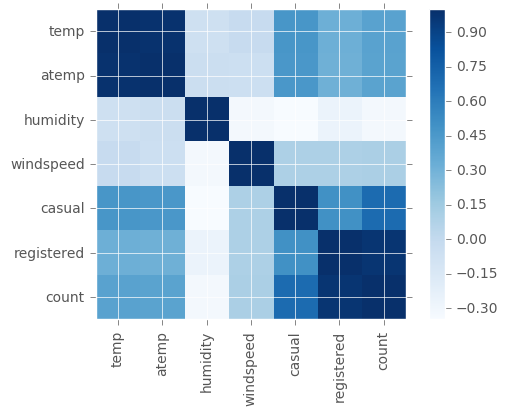

In [49]:
df3 = df[['temp','atemp','humidity','windspeed','casual','registered','count']]
plt.imshow(df3.corr(), cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(df3.columns))]
plt.xticks(tick_marks, df3.columns, rotation='vertical')
plt.yticks(tick_marks, df3.columns)
plt.show()

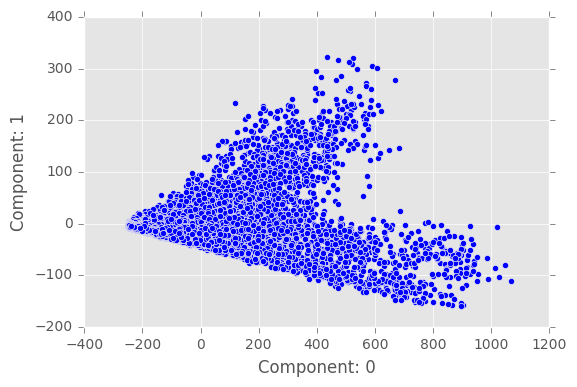

In [41]:
df2 = df.set_index('datetime')
pca = PCA(n_components=5)
pca.fit(df2)
T = pca.transform(df2)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('Component: 0')
ax.set_ylabel('Component: 1')
ax.scatter(T[:,0],T[:,1])
plt.show()